- Assignment:

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [1]:
# Import packages and libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data from Sklearn's datasets:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# we fit k_means with k value from 2 to 5:

cluster_numbers = [2, 3, 4, 5]
kmeans_clusters = []

# Defining the k-means

for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

K-means with k = 2


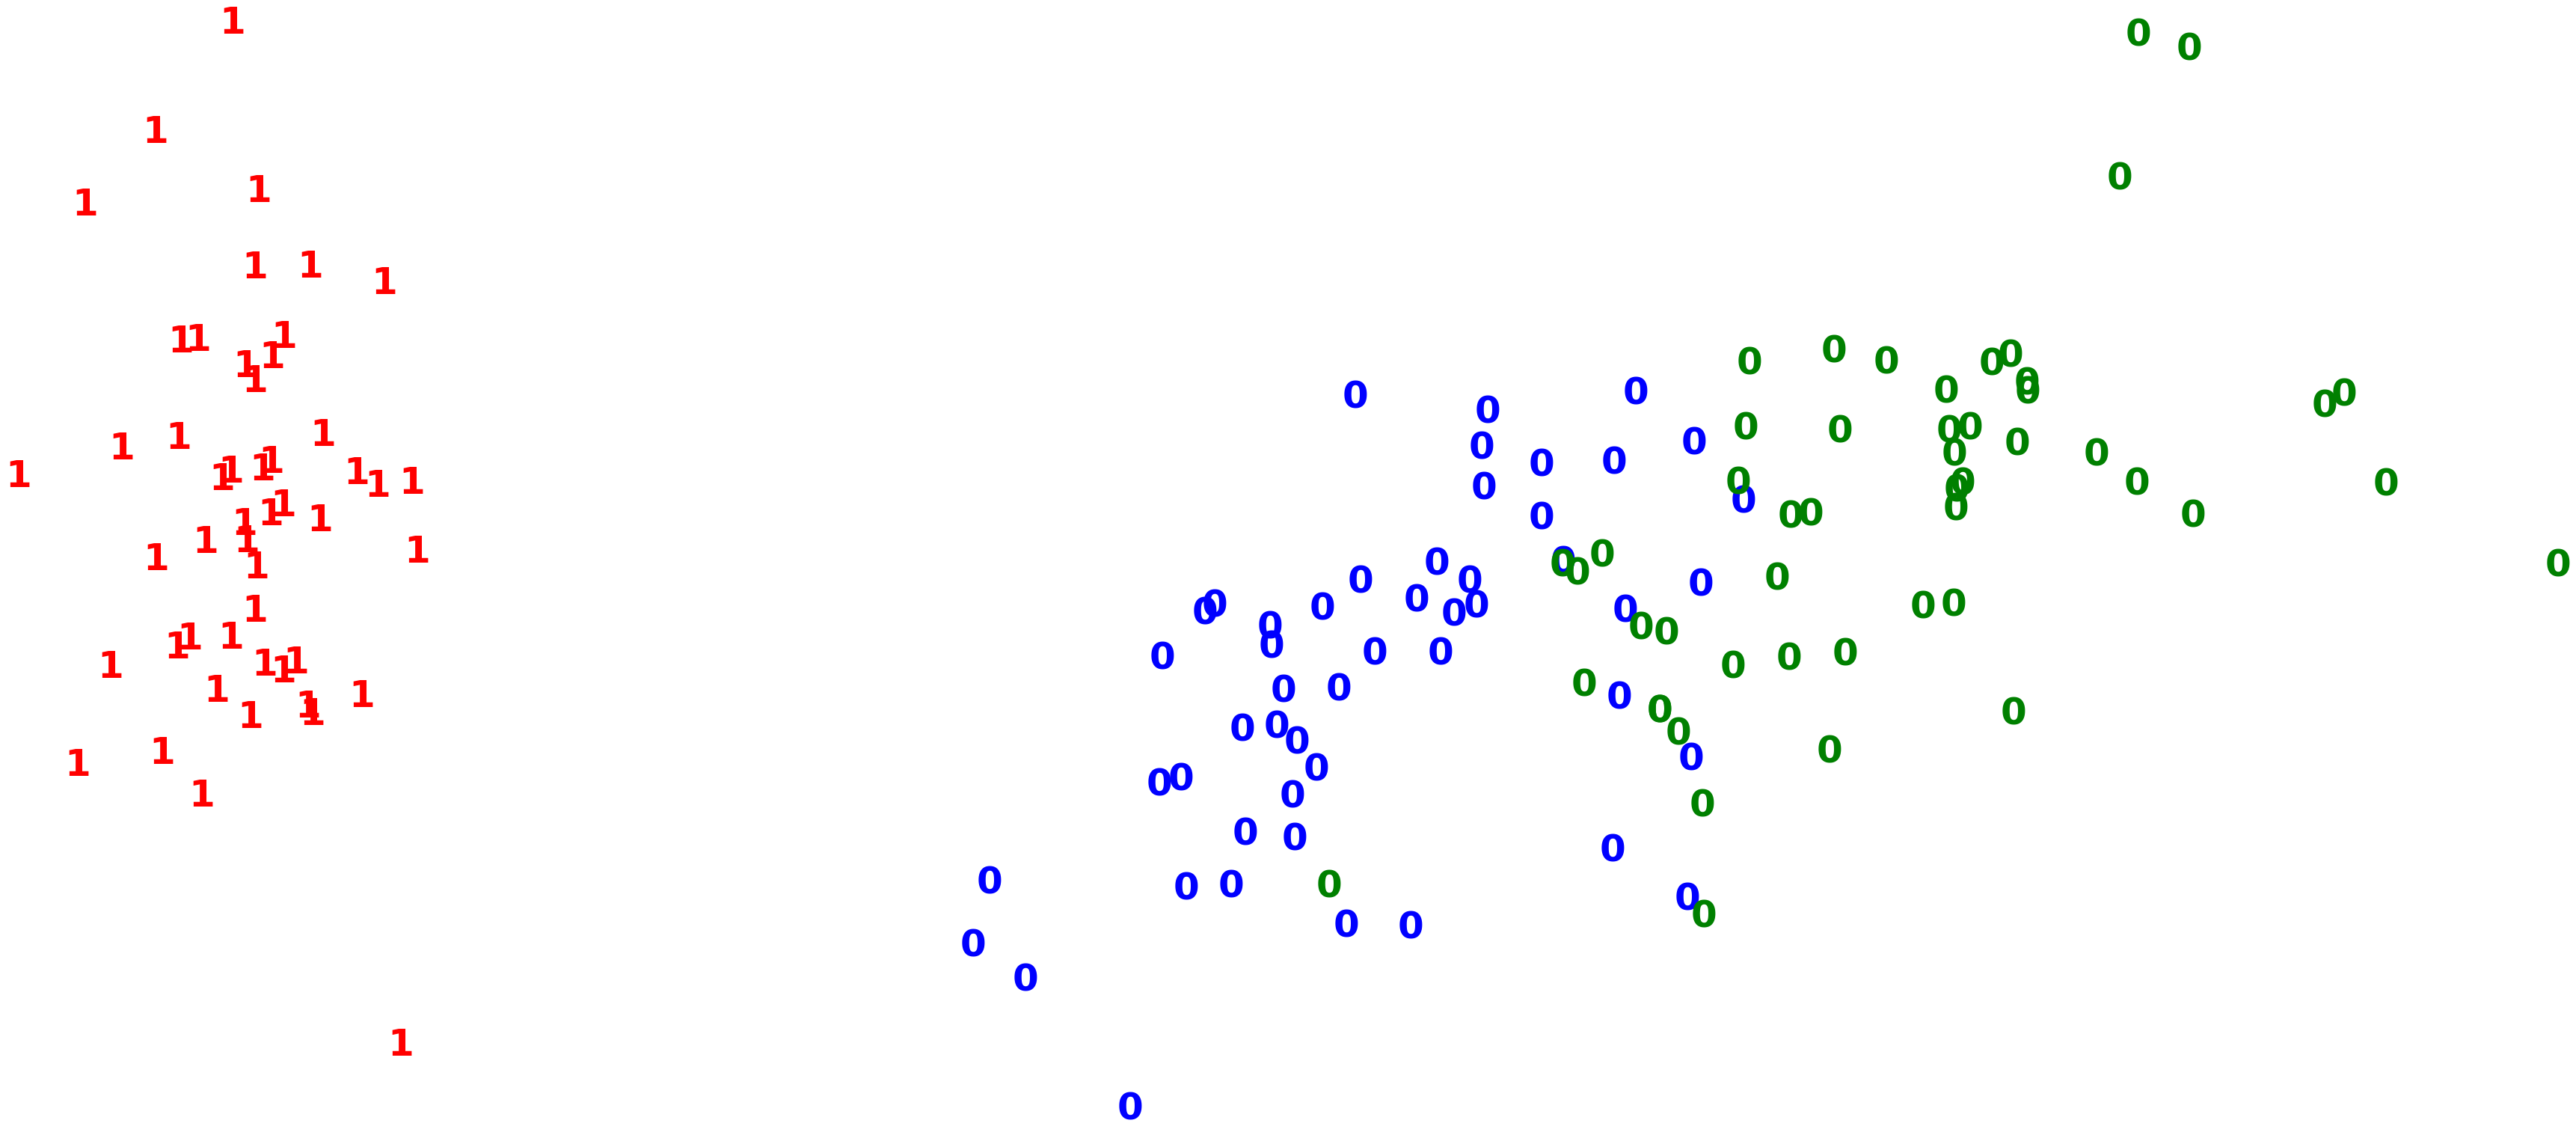

K-means with k = 3


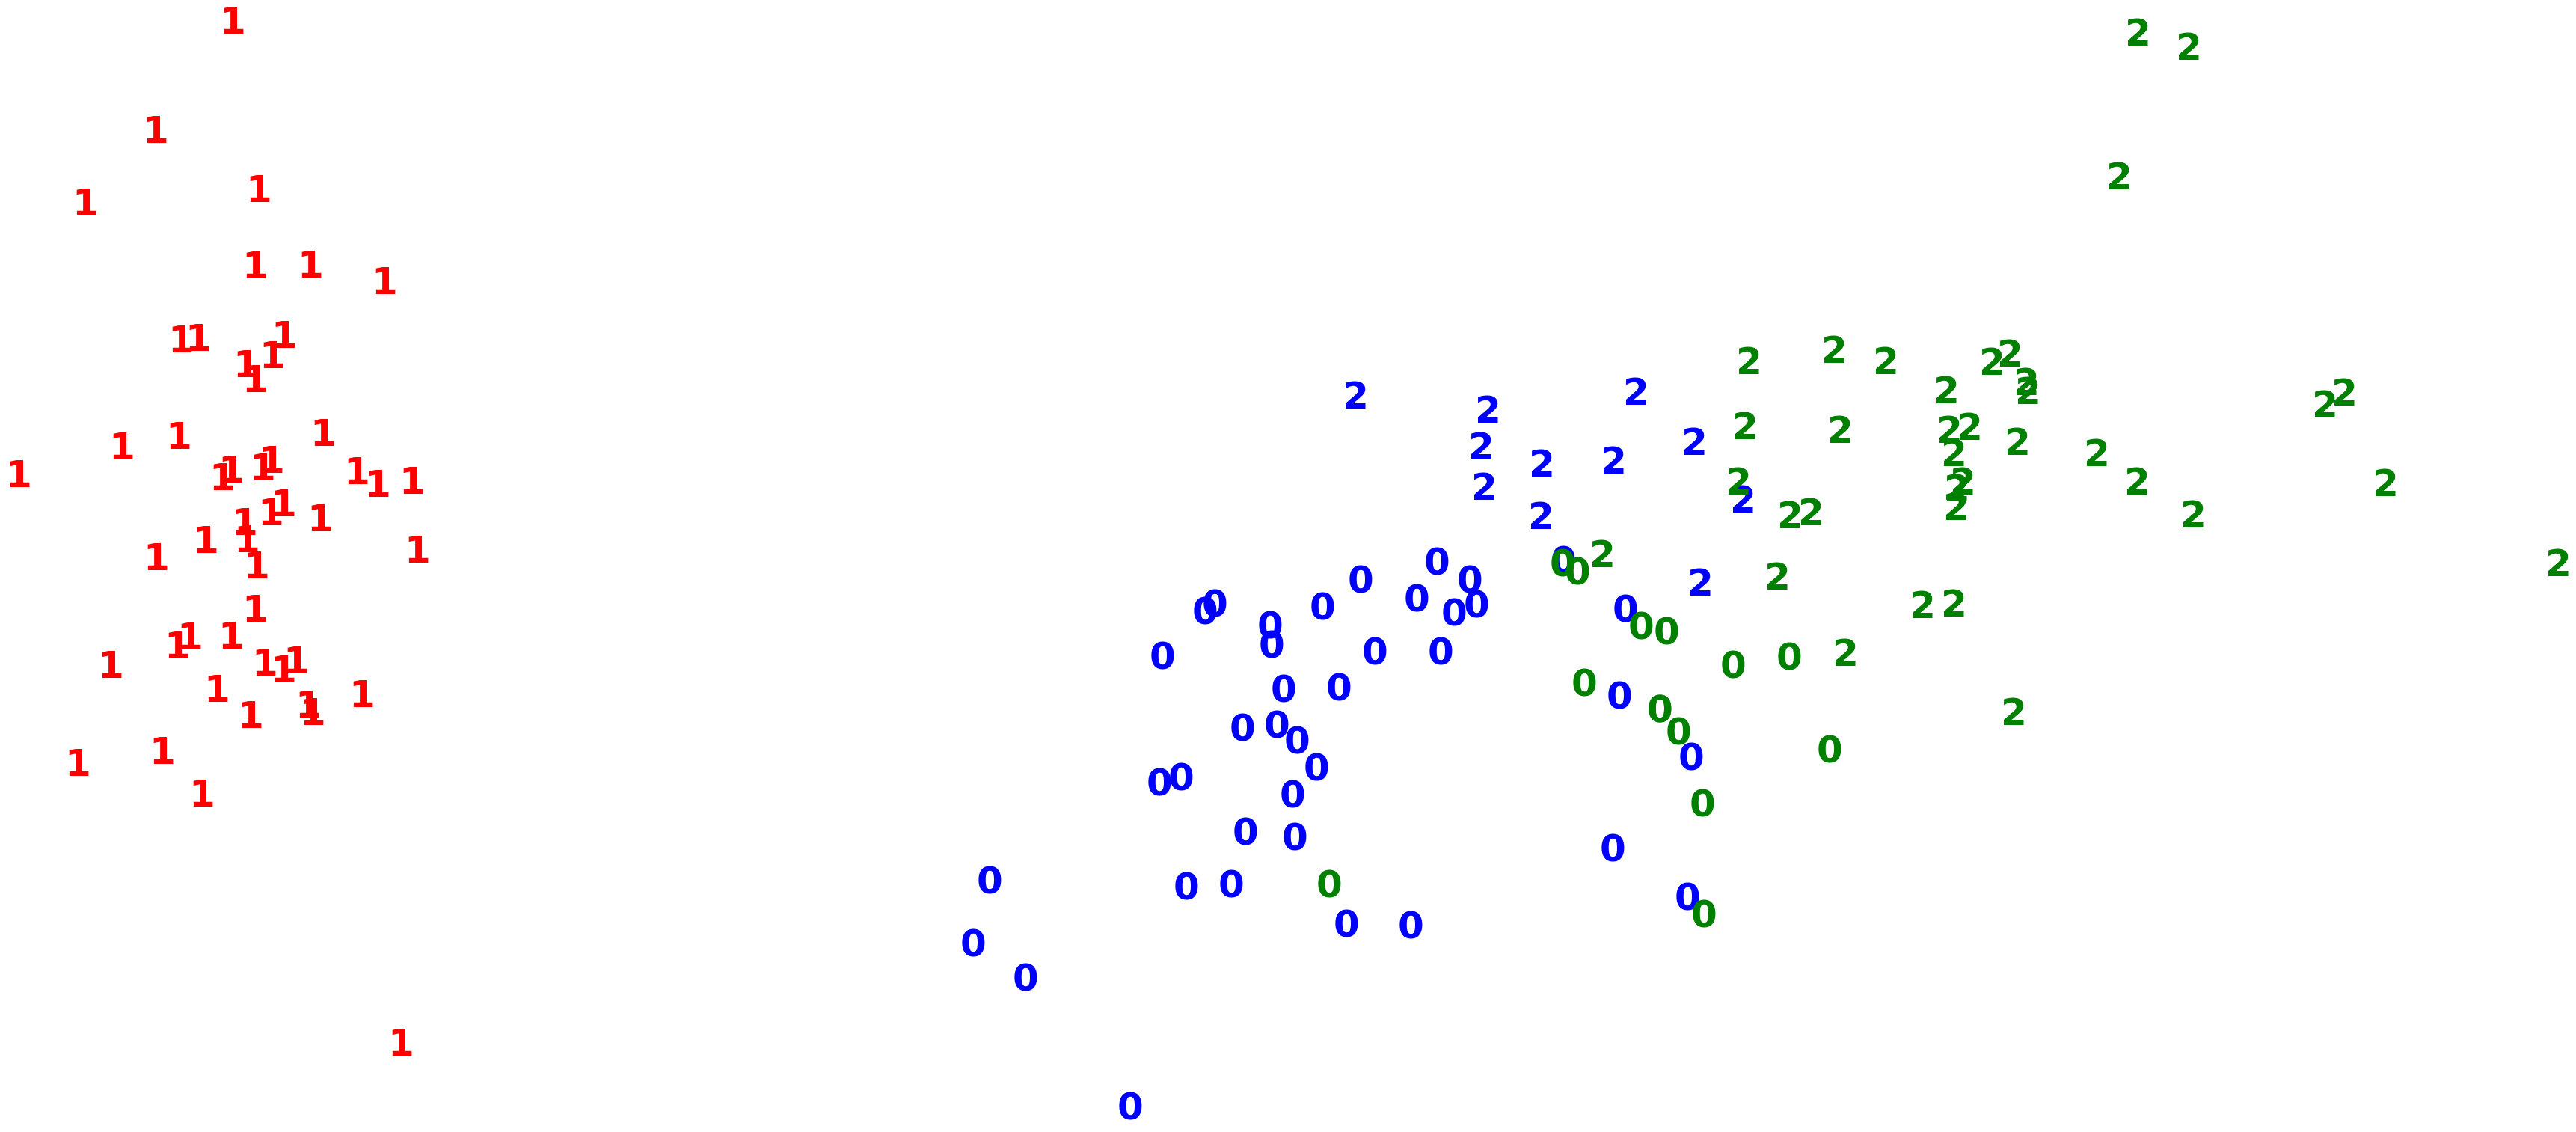

K-means with k = 4


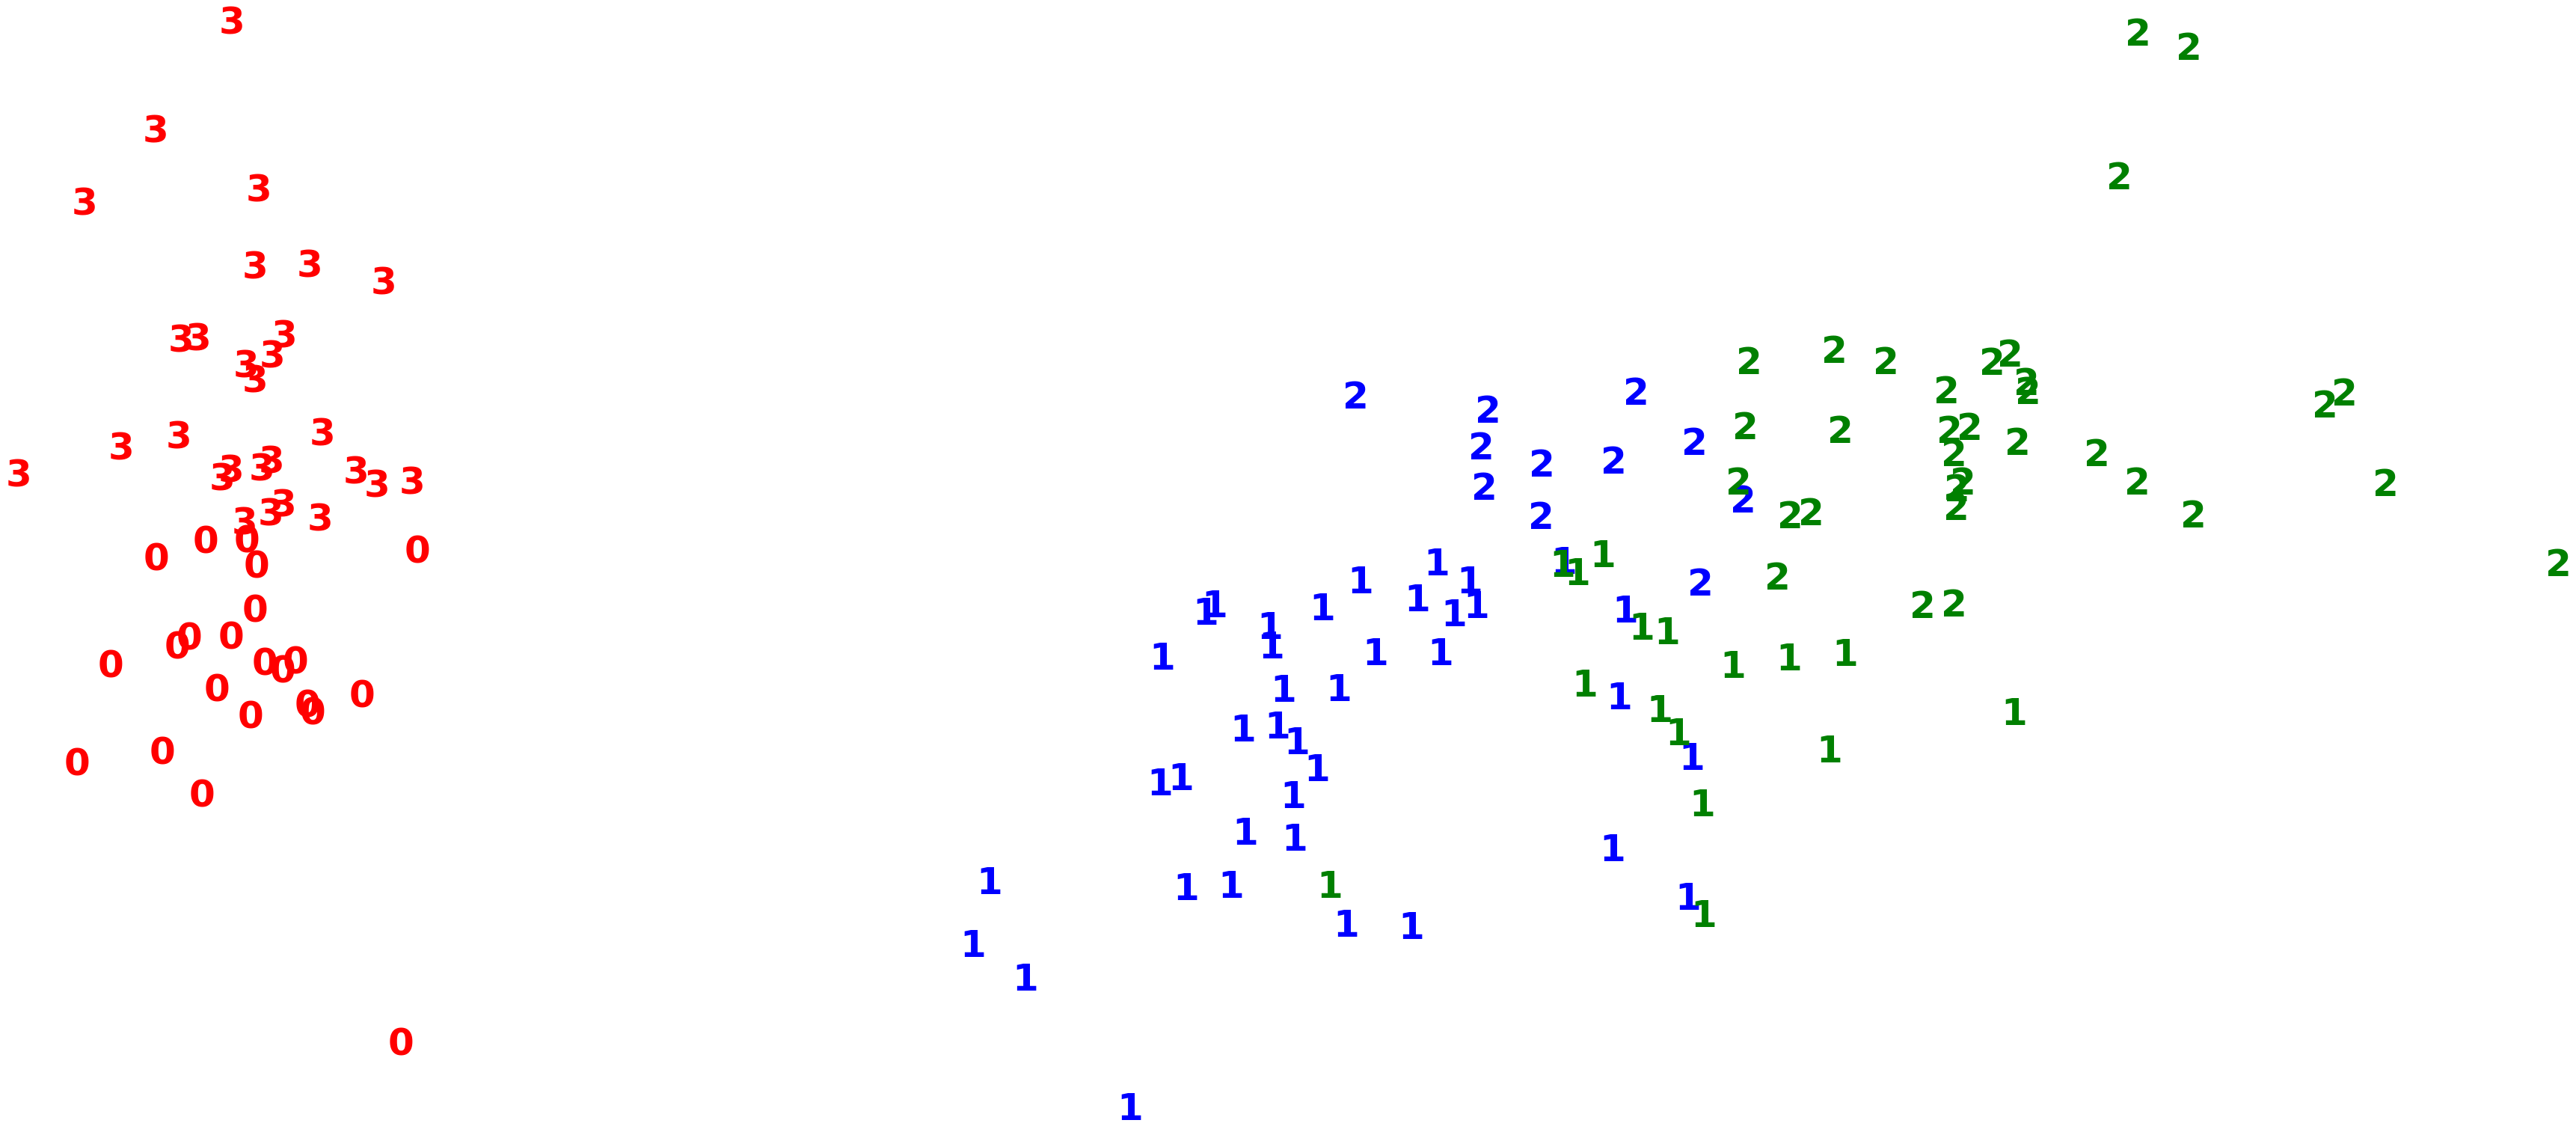

K-means with k = 5


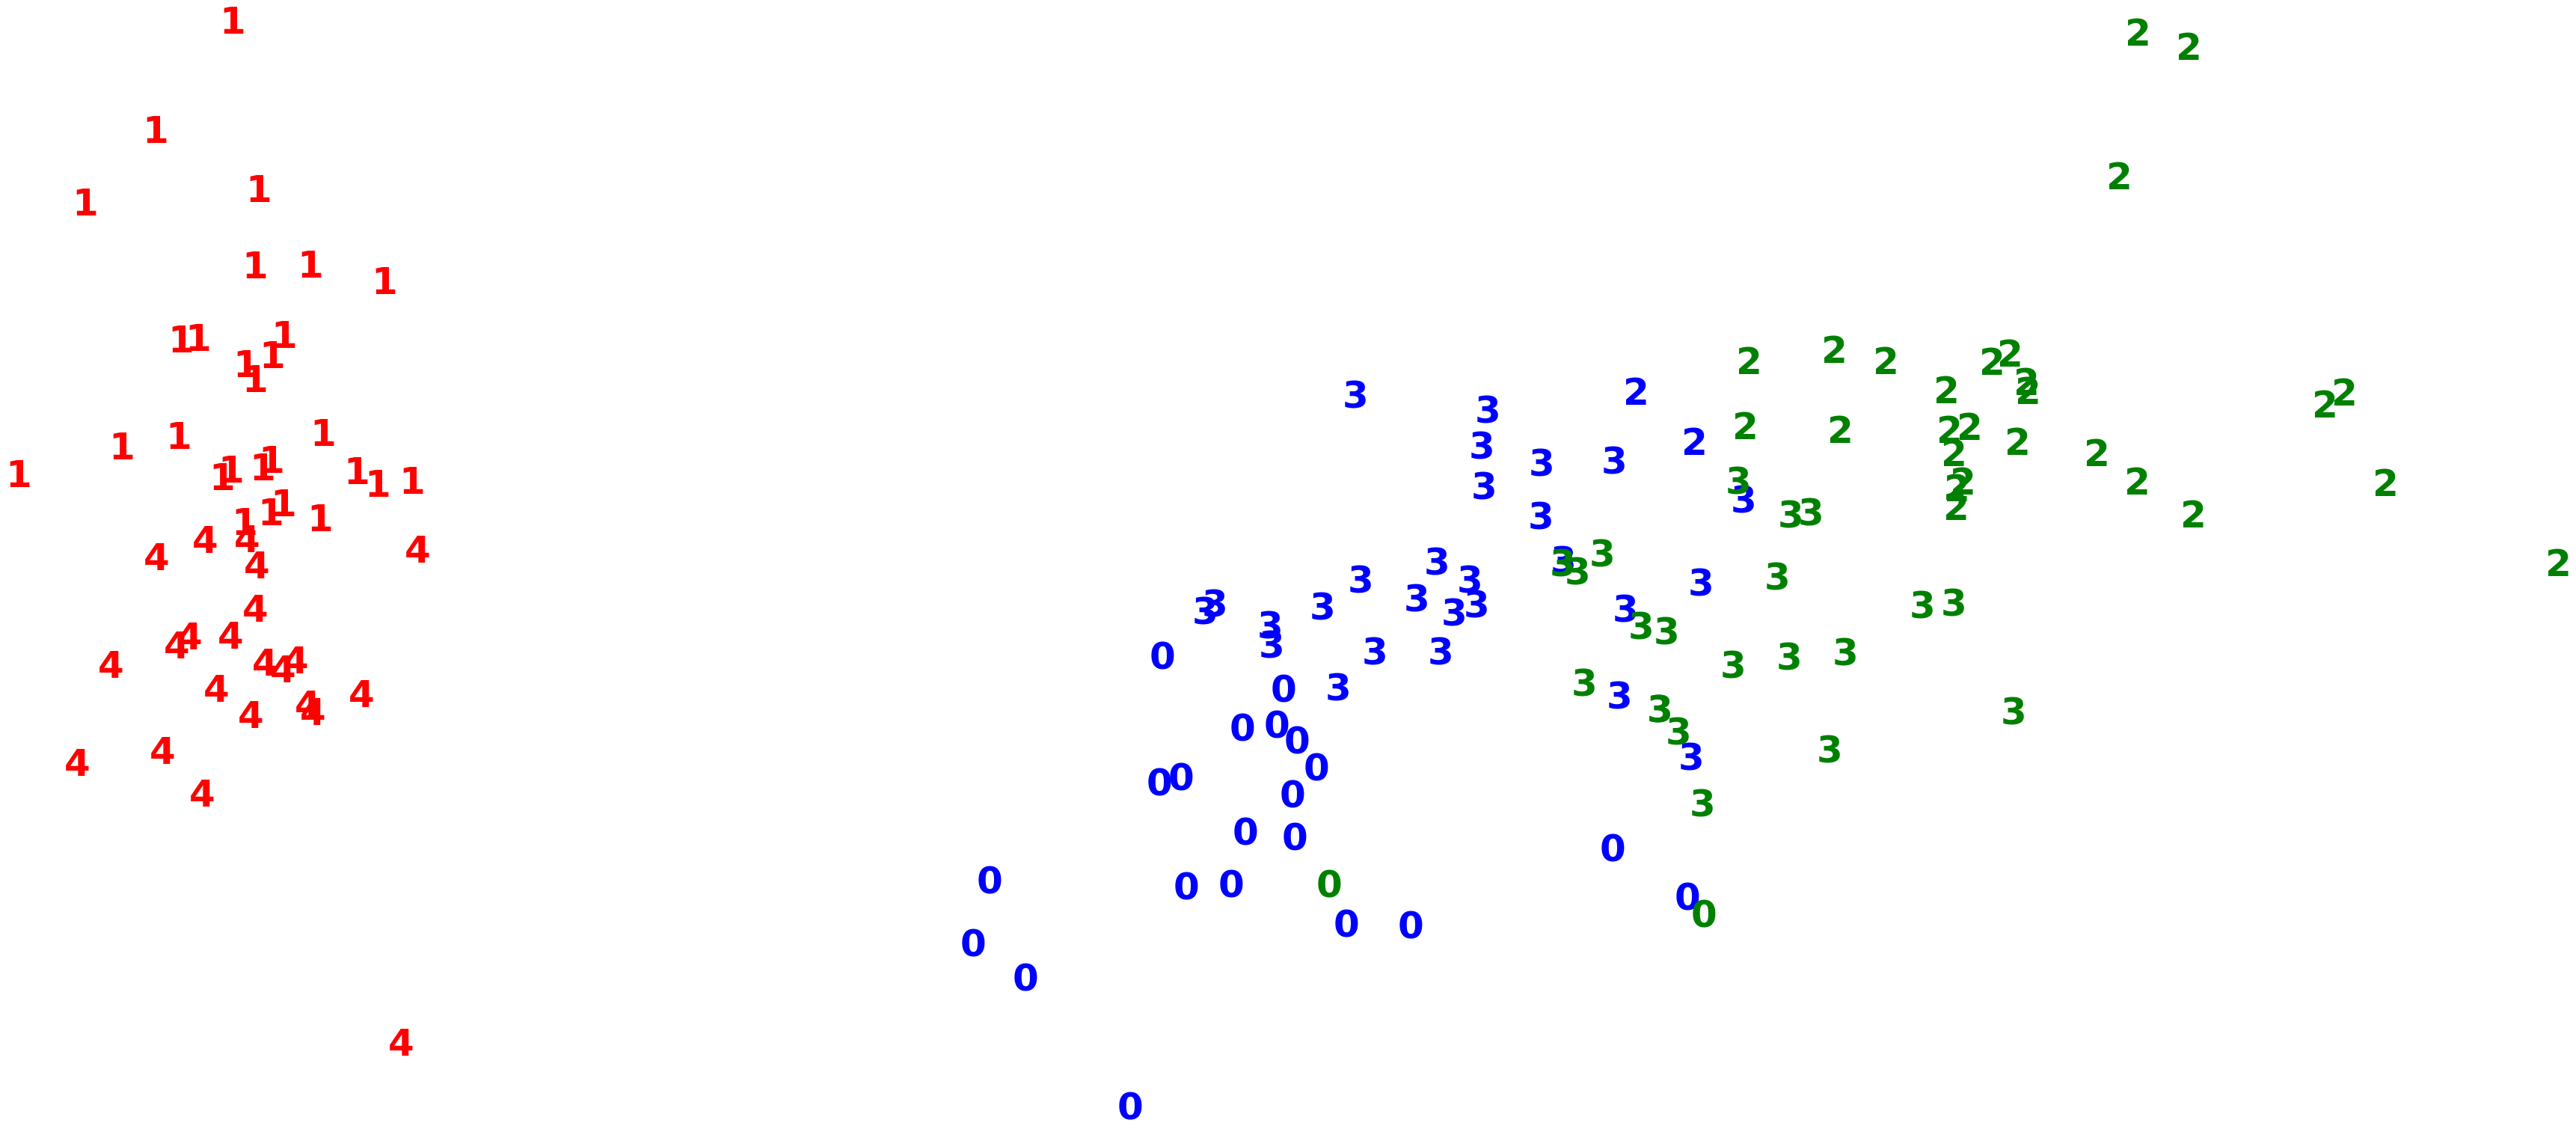

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, cluster in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    print("K-means with k = {}".format(cluster_numbers[i]))
                 
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

As you can see, the best k_means is for k=3, because successfully identify the linearly separable class from the other two. However, for the inseparable two classes, the algorithm produced some incorrectly assigned predictions.
for k=2 can be acceptable because k_means successfully identify the linearly separable class from the other two, but it can only assign a single cluster to the linearly non-separable classes. 
For the other k, assign more than one cluster to the linearly separable class which is not acceptable.

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

load the dataset from the Thinkful's database. 

The dataset needs some preprocessing. S
Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [5]:
# Load dataset:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [6]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [7]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
# Reduce it to two components for visualization;
pca = PCA(n_components=2).fit_transform(X_std)

# Calculate predicted values:
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)


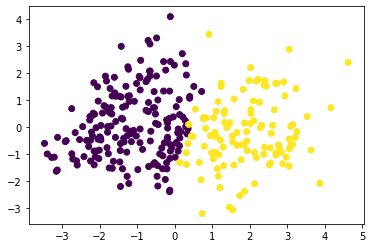

In [9]:
# Plot the solution:
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

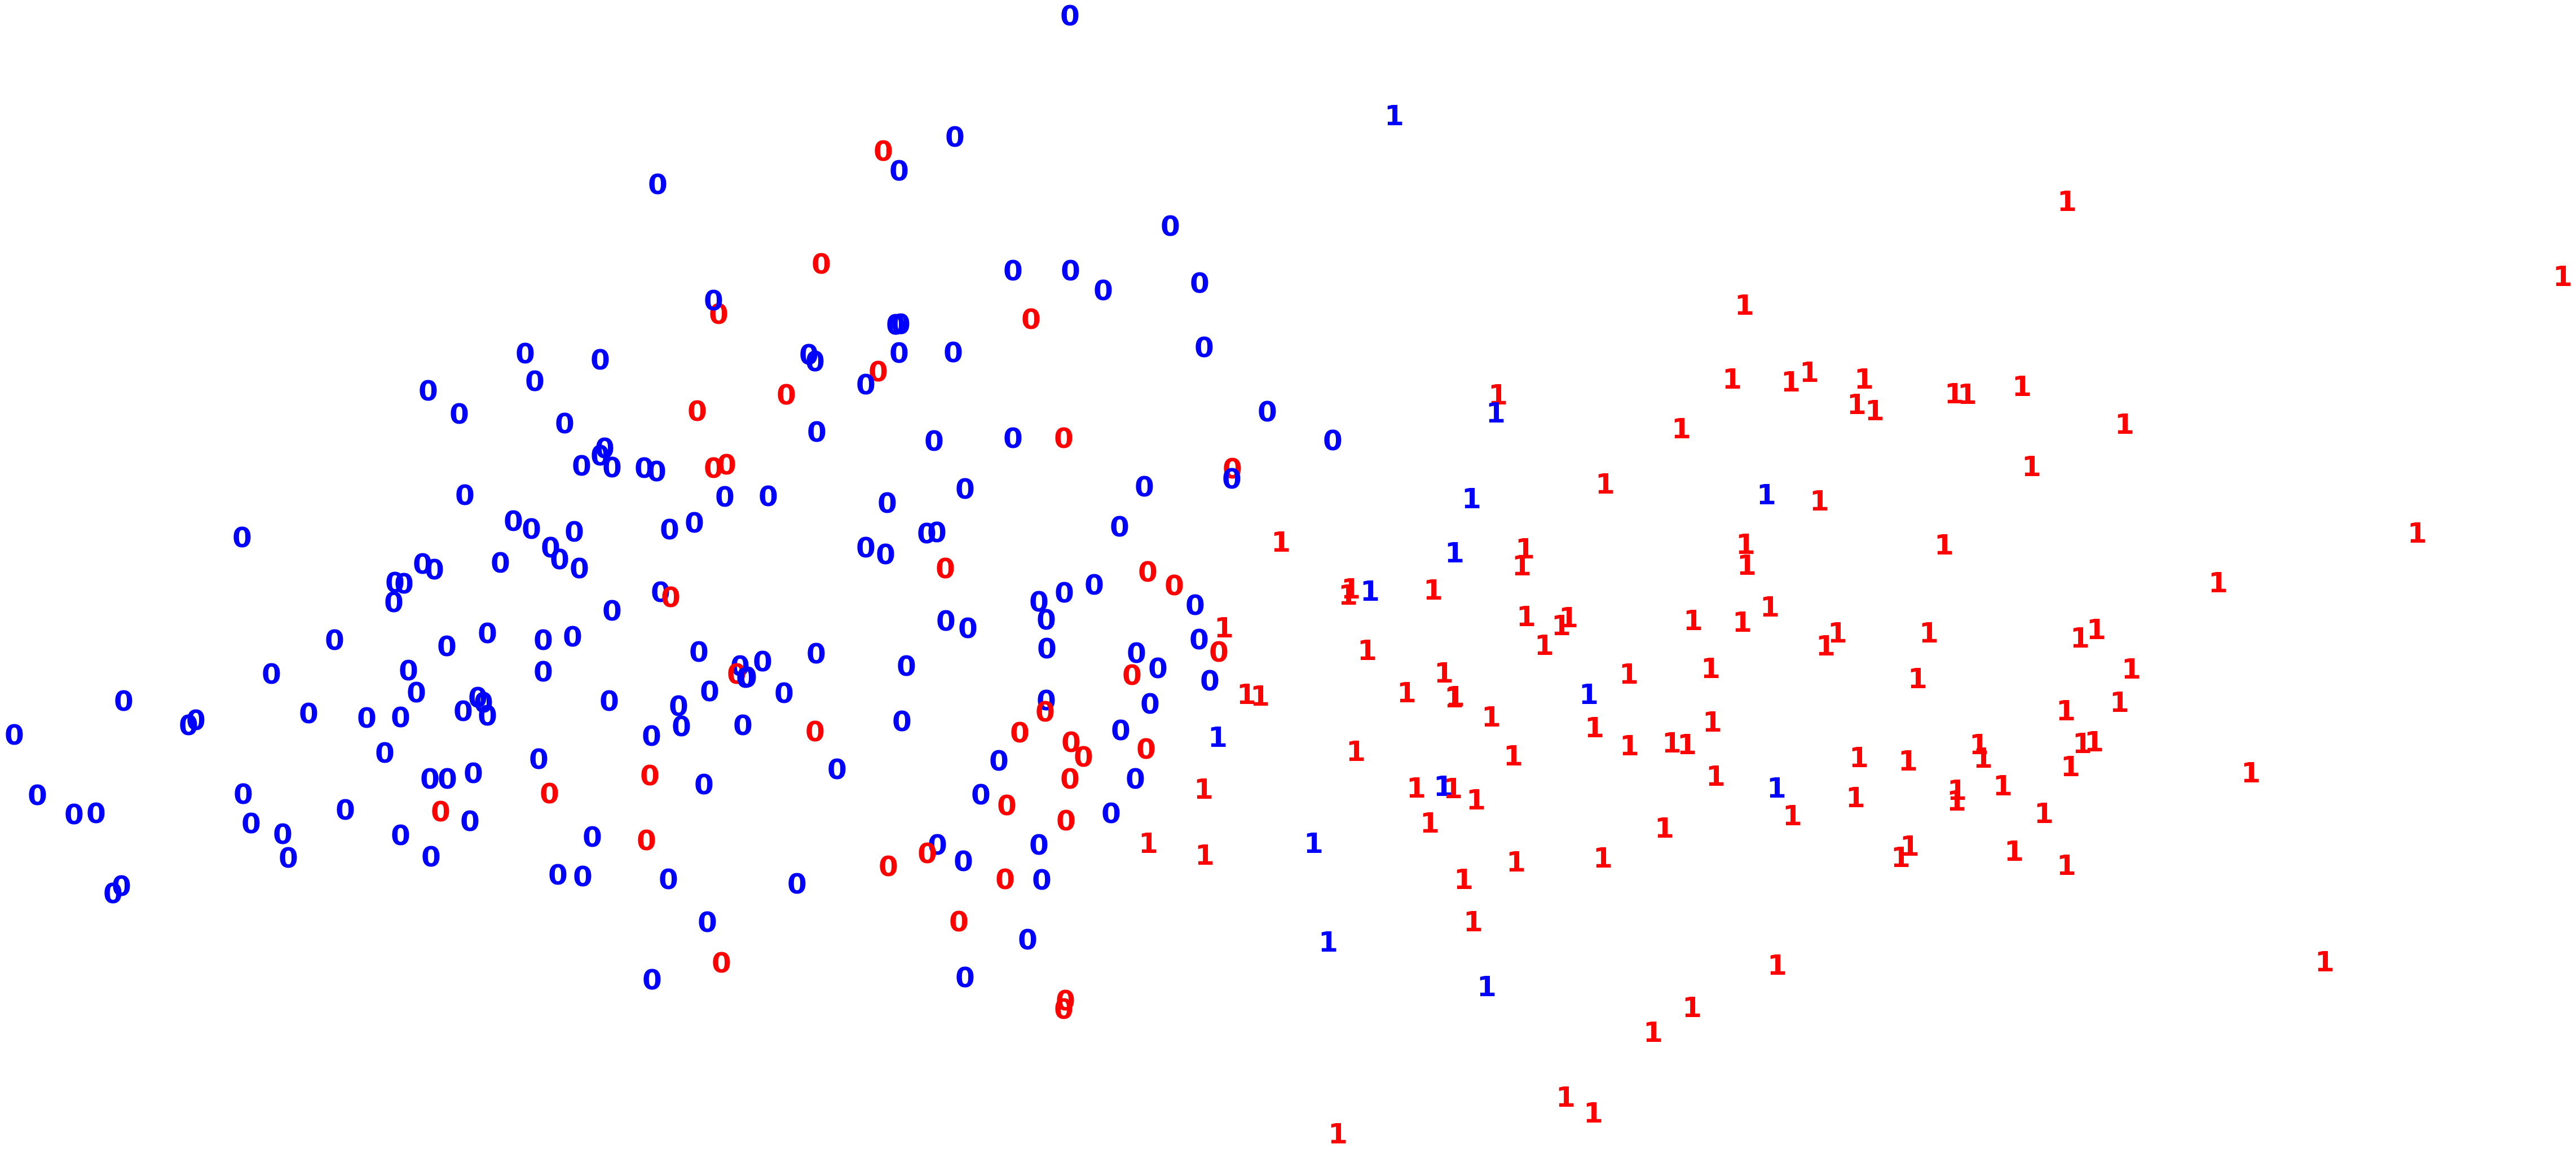

In [10]:
# Plot the solution with numbers:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [11]:
##### For checking the solution against the data we can use crosstab or confusion matrix:

# Using crosstab:
print('Comparing k-means clusters against the data by using crosstab:')
print(pd.crosstab(y, y_pred))

# Using confusion matrix:
print('Comparing k-means clusters against the data by using confusion matrix:')
print(confusion_matrix(y, y_pred)) 
print('Accuracy Score :',accuracy_score(y, y_pred))

Comparing k-means clusters against the data by using crosstab:
col_0    0    1
row_0          
0       38  101
1      151   13
Comparing k-means clusters against the data by using confusion matrix:
[[ 38 101]
 [151  13]]
Accuracy Score : 0.16831683168316833


As you can see, the diagonal elements show the number of correct classifications for each class, so 38 means correctly diagnosis does not have heart disease and 13 means correctly diagnosis heart disease.
The off-diagonal elements provides the misclassifications, so around 252 elements are in misclassifications. 
and the accuracy score is very low around 17%.